# 4.10 Coding Etiquette & Excel Reporting Part I

### This script contains the following points:
 1. Import libraries and check data
 2. Address security implications
 3. Create a region column
 4. Create an exclusion flag for low-activity customers
 5. Create profiling variables based on age, income, certain goods in the “department_id” column, and number of dependents
 6. Create visualizations
 7. Aggregate the max, mean, and min variables on a customer profile level for usage frequency and expenditure
 8. Compare customer profiles with regions and departments
 9. Export data


### 1. Import libraries & data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/jodikim/I0_2022_Instacart_Analysis'

In [3]:
df_orders_products_all = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'orders_products_customers_merged.pkl'))

### Checking data

In [4]:
df_orders_products_all.shape

(32404859, 33)

In [5]:
df_orders_products_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   new_customer            bool    
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  price_range             object  
 15  busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  user_spending           float64 
 19  spending_flag           object  
 20  median_prior_order      float64 
 21  order_

In [6]:
df_orders_products_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [8]:
# Delete any duplicates or unecessary columns

df = df_orders_products_all.drop(columns = ['_merge'])

### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [9]:
# Remove first and last name due to security implications. user_id can be used for identification

df = df_orders_products_all.drop(columns = ['first_name', 'last_name'])

In [10]:
# Check all changes

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,order_frequency_flag,busiest_days,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent Customer,Regulary busy days,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent Customer,Slowest days,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent Customer,Slowest days,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent Customer,Slowest days,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent Customer,Slowest days,Female,Alabama,31,2/17/2019,3,married,40423,both


### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [11]:
# Check dataframe dimensions

df.shape

(32404859, 31)

In [14]:
# Check frequency for state column

df['state'].value_counts(dropna= False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [13]:
df['state'].dtype

dtype('O')

In [15]:
# Defining regions 

region_NE = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']

In [16]:
region_MW = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Ohio', 'North Dakota', 'Nebraska', 'South Dakota', 'Wisconsin']

In [17]:
region_S = ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia', 'District of Columbia', 'Texas', 'Oklahoma'] 

In [18]:
region_W = ['Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Nevada', 'Montana', 'Oregon', 'Utah', 'Washington', 'Wyoming', 'Arizona', 'New Mexico']

In [20]:
# Creating if statements for regional segmentation

df.loc[df['state'].isin (region_NE), 'region'] = 'Northeast'

In [21]:
df.loc[df['state'].isin (region_MW), 'region'] = 'Midwest'

In [22]:
df.loc[df['state'].isin (region_S), 'region'] = 'South'

In [23]:
df.loc[df['state'].isin (region_W), 'region'] = 'West'

In [24]:
# Check frequency

df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [25]:
# Confirm region changes

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,busiest_days,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Regulary busy days,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Slowest days,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,False,196,1,1,...,Slowest days,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Slowest days,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,False,196,1,1,...,Slowest days,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [26]:
# Determine if there's a difference in spending habits between the different US regions

crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [27]:
crosstab.to_clipboard()

In [28]:
crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


#### There are different spending habits across regions. The data shows the lowest spenders are in the Northeast with the highest spenders in the South and West regions. Note, these regions have different populations sizes. 

### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [30]:
# Create exclusion flag by using max_order column

df.loc[df['max_order'] < 5, 'exclusion flag'] = 'low-activity'
df.loc[df['max_order'] >= 5, 'exclusion flag'] = 'high-activity'

In [31]:
df['exclusion flag'].value_counts(dropna = False)

high-activity    30964564
low-activity      1440295
Name: exclusion flag, dtype: int64

In [32]:
# Check dataframe

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity
2,473747,1,3,3,12,21.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity
4,431534,1,5,4,15,28.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,high-activity


In [33]:
# Dropping low-activity from dataframe

df_2 = df.drop(df[df.max_order < 5].index)

In [34]:
# Checking dataframe

df_2.shape

(30964564, 33)

In [36]:
# Exporting df_2 excluding less than 5 orders

df_2.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'df_low_activity.pkl'))

### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [37]:
# Creating variable based on age

df['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

### Minimum age is 18 and maximum age is 81 with an average of 49. To group will use this age range by generation: https://www.beresfordresearch.com/age-range-by-generation/ 

    A) Gen Z: 18-26
    B) Millennials: 27-42
    C) Gen X: 43-58
    D) Boomers II: 59-68
    E) Boomers I: 69-77
    F) Post War: 78-81

In [38]:
# Creating age_flag

df.loc[df['age'] <= 26, 'age_flag'] = 'Gen Z'

In [40]:
df.loc[(df['age'] <= 42) & (df['age'] >= 27), 'age_flag'] = 'Millennials'

In [41]:
df.loc[(df['age'] <= 58) & (df['age'] >= 43), 'age_flag'] = 'Gen X'

In [42]:
df.loc[(df['age'] <= 68) & (df['age'] >= 59), 'age_flag'] = 'Boomers II'

In [43]:
df.loc[(df['age'] <= 77) & (df['age'] >= 69), 'age_flag'] = 'Boomers I'

In [44]:
df.loc[df['age'] >= 78, 'age_flag'] = 'Post War'

In [45]:
# Confirm value counts

df['age_flag'].value_counts(dropna = False)

Gen X          8183059
Millennials    8094045
Boomers II     4976444
Gen Z          4558002
Boomers I      4543726
Post War       2049583
Name: age_flag, dtype: int64

In [46]:
# Creating income variable

df['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

### Minimum income is 25,903 and the maximum 593,901. To group by income will use these groups:

    A) Low: 32,048 or less
    B) Lower Middle: 32,049 - 53,413
    C) Middle Class: 53,414 - 106,827
    D) Upper Middle Class: 106,828 - 373,894
    E) Wealthy: 373,895 and up

In [47]:
# Creating income_flag

df.loc[df['income'] <= 32048, 'income_flag'] = 'Low Class'

In [48]:
df.loc[(df['income'] >= 32049) & (df['income'] <= 53413), 'income_flag'] = 'Lower Middle Class'

In [49]:
df.loc[(df['income'] >= 53414) & (df['income'] <= 106827), 'income_flag'] = 'Middle Class'

In [50]:
df.loc[(df['income'] >= 106828) & (df['income'] <= 373894 ), 'income_flag'] = 'Upper Middle Class'

In [51]:
df.loc[df['income'] >= 373895, 'income_flag'] = 'Wealthy Class'

In [52]:
# Checking frequency for income_flag

df['income_flag'].value_counts(dropna = False)

Middle Class          15246357
Upper Middle Class    12811528
Lower Middle Class     3764233
Low Class               523753
Wealthy Class            58988
Name: income_flag, dtype: int64

In [53]:
# Checking department_id

df['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

In [54]:
# Importing department data

df_dept = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_Data', 'departments_wrangled.csv'))

In [55]:
# Checking department data

df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [56]:
#Rename column Unnamed: 0 to department_id

df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [57]:
# Checking changes of renaming column

df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [58]:
# Combining data sets

df_merge = df.merge(df_dept, on = 'department_id')

In [59]:
df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,date_joined,n_dependants,fam_status,income,_merge,region,exclusion flag,age_flag,income_flag,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2/17/2019,3,married,40423,both,South,high-activity,Millennials,Lower Middle Class,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,2/17/2019,3,married,40423,both,South,high-activity,Millennials,Lower Middle Class,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,2/17/2019,3,married,40423,both,South,high-activity,Millennials,Lower Middle Class,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,2/17/2019,3,married,40423,both,South,high-activity,Millennials,Lower Middle Class,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,2/17/2019,3,married,40423,both,South,high-activity,Millennials,Lower Middle Class,beverages


In [60]:
df_merge['department'].value_counts(dropna = False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

In [61]:
# Creating a data dictionary

dept = zip(df_merge['department_id'], df_merge['department'])

In [62]:
depts_dict = dict(dept)

In [63]:
depts_dict

{7: 'beverages',
 16: 'dairy eggs',
 19: 'snacks',
 17: 'household',
 4: 'produce',
 14: 'breakfast',
 13: 'pantry',
 3: 'bakery',
 1: 'frozen',
 9: 'dry goods pasta',
 15: 'canned goods',
 11: 'personal care',
 12: 'meat seafood',
 20: 'deli',
 6: 'international',
 5: 'alcohol',
 21: 'missing',
 8: 'pets',
 18: 'babies',
 2: 'other',
 10: 'bulk'}

In [64]:
df_merge.shape

(32404859, 36)

In [65]:
# Creating variable for number of dependants

df_merge['n_dependants'].value_counts(dropna = False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: n_dependants, dtype: int64

### Dependants range from 0-3. Will group by the follwing range:

    A) Single: 0 dependants
    B) Family with baby: if their order falls under department of id 18 'babies'
    C) Family: 1-3 dependants and if their order does not include id 18 'babies'

In [66]:
# Create a flag for family_status

df_merge.loc[df_merge['n_dependants'] <= 0, 'family_flag'] = 'single'

In [67]:
df_merge.loc[(df_merge['department_id'] == 18) & (df_merge['n_dependants'] > 0), 'family_flag'] = 'family with baby'

In [68]:
df_merge.loc[(df_merge['department_id'] !=18) & (df_merge['n_dependants'] > 0), 'family_flag'] = 'family'

In [69]:
# Checking family_flag

df_merge['family_flag'].value_counts(dropna = False)

family              23990048
single               8097503
family with baby      317308
Name: family_flag, dtype: int64

In [70]:
df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,n_dependants,fam_status,income,_merge,region,exclusion flag,age_flag,income_flag,department,family_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,3,married,40423,both,South,high-activity,Millennials,Lower Middle Class,beverages,family
1,2398795,1,2,3,7,15.0,False,196,1,1,...,3,married,40423,both,South,high-activity,Millennials,Lower Middle Class,beverages,family
2,473747,1,3,3,12,21.0,False,196,1,1,...,3,married,40423,both,South,high-activity,Millennials,Lower Middle Class,beverages,family
3,2254736,1,4,4,7,29.0,False,196,1,1,...,3,married,40423,both,South,high-activity,Millennials,Lower Middle Class,beverages,family
4,431534,1,5,4,15,28.0,False,196,1,1,...,3,married,40423,both,South,high-activity,Millennials,Lower Middle Class,beverages,family


### 6. Create an appropriate visualization to show the distribution of profiles

<AxesSubplot:>

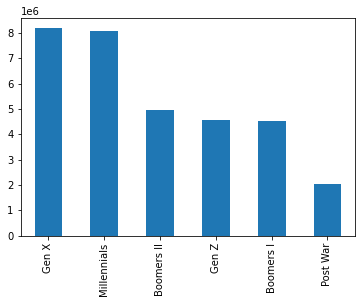

In [71]:
# Create bar chart for age_flag 

df_merge['age_flag'].value_counts().plot.bar()

### Data shows most of the customers are Gen X or Millennials

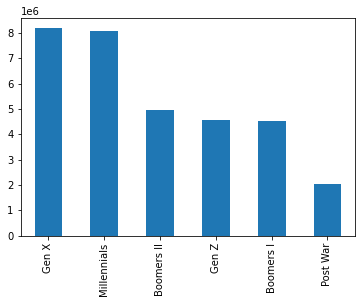

In [109]:
bar = df_merge['age_flag'].value_counts().plot.bar()

In [110]:
# Exporting bar chart

bar.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_age_flag.png'))

<AxesSubplot:>

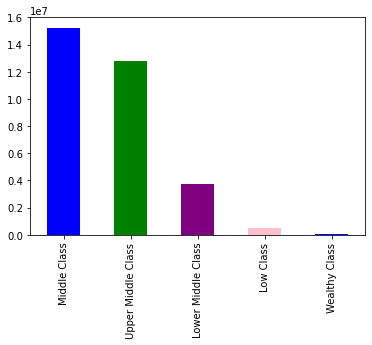

In [72]:
# Create bar chart for income_flag

df_merge['income_flag'].value_counts().plot.bar(color = ['blue', 'green', 'purple', 'pink'])

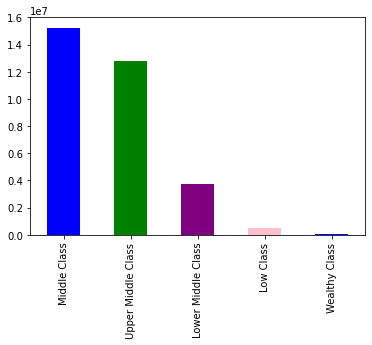

In [111]:
bar2 = df_merge['income_flag'].value_counts().plot.bar(color = ['blue', 'green', 'purple', 'pink'])

In [112]:
# Exporting bar2 chart

bar2.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_income_flag.png'))

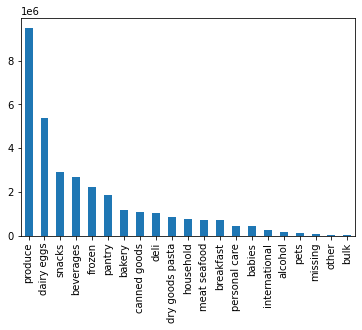

In [113]:
# Create chart for deparment

bar3 = df_merge['department'].value_counts().plot.bar()

In [114]:
# Exporting bar3 chart

bar3.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_department.png'))

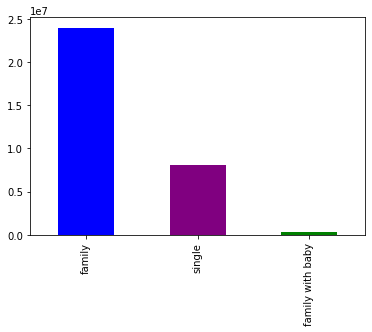

In [115]:
bar4 = df_merge['family_flag'].value_counts().plot.bar(color = ['blue', 'purple', 'green'])

In [116]:
# Exporting bar4 chart

bar4.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_family_flag.png'))

In [76]:
df_merge['order_frequency_flag'].value_counts(dropna = False)

Frequent Customer        21559853
Regular Customer          7208564
Non-frequent Customer     3636437
NaN                             5
Name: order_frequency_flag, dtype: int64

In [78]:
df_merge.shape

(32404859, 37)

In [79]:
df_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'user_spending',
       'spending_flag', 'median_prior_order', 'order_frequency_flag',
       'busiest_days', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', '_merge', 'region', 'exclusion flag',
       'age_flag', 'income_flag', 'department', 'family_flag'],
      dtype='object')

### 7. Aggregate the max, mean, and min variables on a customer profile level for usage frequency and expenditure.

In [80]:
# Creating days column with name for customer profile

df_merge.loc[df_merge['orders_day_of_week'] == 0, 'day_of_week'] = 'saturday'

In [81]:
df_merge.loc[df_merge['orders_day_of_week'] == 1, 'day_of_week'] = 'sunday'

In [82]:
df_merge.loc[df_merge['orders_day_of_week'] == 2, 'day_of_week'] = 'monday'

In [83]:
df_merge.loc[df_merge['orders_day_of_week'] == 3, 'day_of_week'] = 'tuesday'

In [84]:
df_merge.loc[df_merge['orders_day_of_week'] == 4, 'day_of_week'] = 'wednesday'

In [85]:
df_merge.loc[df_merge['orders_day_of_week'] == 5, 'day_of_week'] = 'thursday'

In [86]:
df_merge.loc[df_merge['orders_day_of_week'] == 6, 'day_of_week'] = 'friday'

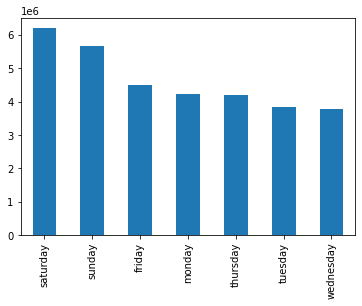

In [117]:
# See which days of weeks are busiest per value counts

bar5 = df_merge['day_of_week'].value_counts().plot.bar()

In [118]:
# Exporting bar5 chart

bar5.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_orders_dow2.png'))

### Weekends are the busiest days with Saturday being the busiest day

In [89]:
# Creating usage frequency for days since prior order by age range

df_merge.groupby('age_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_flag                                     
Boomers I                11.063289  0.0  30.0
Boomers II               11.130406  0.0  30.0
Gen X                    11.108122  0.0  30.0
Gen Z                    11.106596  0.0  30.0
Millennials              11.110451  0.0  30.0
Post War                 11.083733  0.0  30.0

In [90]:
# Creating income profile usage frequency aggregation

df_merge.groupby('income_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                     mean  min   max
income_flag                                         
Low Class                       11.775951  0.0  30.0
Lower Middle Class              11.506534  0.0  30.0
Middle Class                    11.050339  0.0  30.0
Upper Middle Class              11.026307  0.0  30.0
Wealthy Class                   10.551896  0.0  30.0

In [91]:
# Creating family status profile usage frequency aggregration

df_merge.groupby('family_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
family_flag                                       
family                        11.127201  0.0  30.0
family with baby               9.963975  0.0  30.0
single                        11.080805  0.0  30.0

In [92]:
# Creating gender status profile usage frequency aggregration

df_merge.groupby('gender').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                         mean  min   max
gender                                  
Female              11.085142  0.0  30.0
Male                11.122757  0.0  30.0

In [93]:
# Creating region status profile usage frequency aggregration

df_merge.groupby('region').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                            mean  min   max
region                                     
Midwest                11.181836  0.0  30.0
Northeast              11.075769  0.0  30.0
South                  11.108108  0.0  30.0
West                   11.047196  0.0  30.0

In [94]:
# Creating age profile expenditure frequency aggregation

df_merge.groupby('age_flag').agg({'prices':['mean', 'min', 'max']})

prices              
                  mean  min      max
age_flag                            
Boomers I    12.129949  1.0  99999.0
Boomers II   11.591229  1.0  99999.0
Gen X        12.295344  1.0  99999.0
Gen Z        12.124102  1.0  99999.0
Millennials  11.895325  1.0  99999.0
Post War     11.349993  1.0  99999.0

In [95]:
# Creating income profile expenditure frequency aggregation

df_merge.groupby('income_flag').agg({'prices':['mean', 'min', 'max']})

prices              
                          mean  min      max
income_flag                                 
Low Class             6.499623  1.0     25.0
Lower Middle Class    6.869666  1.0     25.0
Middle Class          8.706452  1.0  99999.0
Upper Middle Class   16.477605  1.0  99999.0
Wealthy Class       256.142405  1.0  99999.0

In [96]:
# Creating family status profile expenditure frequency aggregration

df_merge.groupby('family_flag').agg({'prices':['mean', 'min', 'max']})

prices              
                       mean  min      max
family_flag                              
family            11.987192  1.0  99999.0
family with baby   7.650679  1.0     15.0
single            12.129243  1.0  99999.0

In [98]:
# Creating gender status profile expenditure frequency aggregration

df_merge.groupby('gender').agg({'prices':['mean', 'min', 'max']})

prices              
             mean  min      max
gender                         
Female  11.892098  1.0  99999.0
Male    12.067137  1.0  99999.0

In [99]:
# Creating region status profile usage frequency aggregration

df_merge.groupby('region').agg({'prices':['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    12.715483  1.0  99999.0
Northeast  11.554997  1.0  99999.0
South      12.195577  1.0  99999.0
West       11.319834  1.0  99999.0

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [100]:
# Age by region

pd.crosstab(df_merge['age_flag'], df_merge['region'], dropna = False)

region,Midwest,Northeast,South,West
age_flag,,,,
Boomers I,1048924,810549,1494342,1189911
Boomers II,1161415,896037,1660144,1258848
Gen X,1955362,1446035,2665539,2116123
Gen Z,1050431,798828,1559166,1149577
Millennials,1904632,1408781,2721998,2058634
Post War,476561,362506,690696,519820


### The data shows South & West regions are the highest among Millennials & Gen X

In [101]:
# Income by regions

pd.crosstab(df_merge['income_flag'], df_merge['region'], dropna = False)

region,Midwest,Northeast,South,West
income_flag,,,,
Low Class,125524,85790,183132,129307
Lower Middle Class,874646,677921,1269230,942436
Middle Class,3529522,2669813,5096834,3950188
Upper Middle Class,3048073,2279438,4227847,3256170
Wealthy Class,19560,9774,14842,14812


### The data shows middle class is the highest across all regions, followed by upper middle class

In [102]:
# Family by region

pd.crosstab(df_merge['family_flag'], df_merge['region'], dropna = False)

region,Midwest,Northeast,South,West
family_flag,,,,
family,5618531,4247814,7982917,6140786
family with baby,73594,56621,107309,79784
single,1905200,1418301,2701659,2072343


### The data shows families (1-3 members, non babies) in the South & West regions are the highest spenders. Followed by single and family with baby, which is much lower than the other family statuses across all regions

In [104]:
# Gender by region

pd.crosstab(df_merge['gender'], df_merge['region'], dropna = False)

region,Midwest,Northeast,South,West
gender,,,,
Female,3806645,2763944,5373714,4145527
Male,3790680,2958792,5418171,4147386


### The data shows gender is nearly equal across all regions with male spenders are a bit higher than female. Like the other data, the South & West regions are the highest spenders



In [105]:
# Age by departments

pd.crosstab(df_merge['age_flag'], df_merge['department'], dropna = False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_flag,,,,,,,,,,,,,,,,,,,,,
Boomers I,21377,58915,164275,382950,98150,4755,147675,762572,147439,120847,...,104746,37171,99534,9535,4841,262652,61984,13532,1324441,402860
Boomers II,22912,63990,179709,414329,106685,5235,165013,822752,162919,133162,...,113160,41142,109521,10675,5742,290675,69321,15053,1458115,440301
Gen X,38919,109160,297051,682407,178467,8670,269141,1358286,264031,219337,...,186452,67758,178647,17355,9224,474679,114399,24643,2387537,731110
Gen Z,23046,60810,165291,375524,100590,4964,150872,762535,147714,123061,...,102915,38403,99758,10133,5271,263707,62870,14775,1326518,405955
Millennials,38382,105065,292275,663076,174820,8656,267674,1355634,263283,215440,...,184227,67710,175349,17154,8999,465563,111028,23390,2378835,723638
Post War,9060,25862,73827,169837,44321,2293,67683,336968,65863,54780,...,47166,17069,46118,4293,2214,118093,27970,6323,603845,183686


### Gen X and Millennials are the highest spenders purchasing produce and dairy/eggs. Followed by beverages and pantry items. 

In [106]:
# Income by departments

pd.crosstab(df_merge['income_flag'], df_merge['department'], dropna = False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_flag,,,,,,,,,,,,,,,,,,,,,
Low Class,2878,3683,16419,61760,14301,764,12055,75725,17200,9850,...,13785,3533,4183,1033,690,25049,7301,1194,124709,93485
Lower Middle Class,19734,35918,122305,406017,99109,4914,95896,571357,119351,78705,...,95978,25289,45453,7759,4212,192453,54020,10257,954103,575049
Middle Class,66719,211287,556619,1200438,319703,16382,516651,2572762,496668,421020,...,335047,131519,353891,33173,16951,892255,209444,45563,4573227,1222115
Upper Middle Class,62494,172451,474464,1014290,268587,12509,441255,2168955,416444,355261,...,290961,108388,303995,27119,14331,761921,175909,40222,3815296,991567
Wealthy Class,1871,463,2621,5618,1333,4,2201,9948,1586,1791,...,2895,524,1405,61,107,3691,898,480,11956,5334


### The data shows the middle class purchase produce, dairy/eggs, snacks, beverages and pantry items the most. Followed by upper middle class

In [107]:
# Family by departments

pd.crosstab(df_merge['family_flag'], df_merge['department'], dropna = False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
family_flag,,,,,,,,,,,,,,,,,,,,,
family,114578,0,878023,2013681,528456,26295,803220,4049385,786104,651365,...,557893,201540,534843,52057,27116,1408612,335566,73133,7103846,2166752
family with baby,0,317308,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
single,39118,106494,294405,674442,174577,8278,264838,1349362,265145,215262,...,180773,67713,174084,17088,9175,466757,112006,24583,2375445,720798


### The data shows families with babies only purchase baby items. Families are the highest spenders purchasing produce, dairy/eggs, snacks, beverages and pantry items

### 9. Exporting data

In [122]:
df.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'df4.10.pkl'))

In [123]:
df_merge.to_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'df_merge_final.pkl'))